In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
import sklearn.metrics


# Auxilliary settings for plot
color_pal = sns.color_palette('Dark2')
plt.rcParams['text.color'] = '#000'
plt.rcParams['xtick.color'] = '#000'  
plt.rcParams['ytick.color'] = '#000'  
plt.rcParams['axes.labelcolor'] = '#000' 
plt.style.use('fivethirtyeight')

### Linear Regression Analysis

Objective: To predict the NOx concentration based on the cleaned data utilizing different regression algorithms and identify which among those algorithms has the best model performance:

- Linear Regression Analysis
- Lasso Regression Analysis
- Support Vector Machine (SVM)
- Random Forest Classifier

Feature (X) and Target (y) Variable Creation 

In [2]:
# Feature and Target Variables
df = pd.read_csv('data/AirQualityUCI_clean.csv')

# Adjust Datetime column as index
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime',inplace=True)

In [3]:
# Separating feature varibales with our target variable (NOx concentration)
X = df.drop(['NOx(GT)'],axis=1)
y = df['NOx(GT)']

### Model 1: Linear Regression

In [4]:
# Data Train/Test Split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Model Implementation (Linear Regression)
linear=LinearRegression()
linear.fit(X_train, y_train)
accuracy = linear.score(X_test,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.811150921438749


In [5]:
# Predicting values
y_pred_lm=linear.predict(X_test)
y_pred_lm

array([328.45987439, 209.86566016, 168.83593231, ..., 152.82547628,
       218.4179355 , 262.68889511])

In [7]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_lm = pd.Series(y_pred_lm, name='Predicted NOx')

actual_and_pred = pd.concat([y_test.reset_index(drop=True),y_pred_lm],axis=1)
actual_and_pred.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred.set_index(y_test.index,inplace=True)
actual_and_pred

,Actual NOx,Predicted NOx
Datetime,,
2004-07-01 18:00:00,186.0,328.459874
2004-07-20 18:00:00,143.0,209.865660
2004-10-16 08:00:00,281.0,168.835932
2004-08-27 04:00:00,46.0,72.385452
2004-12-02 01:00:00,223.0,292.664392
...,...,...
2004-12-20 17:00:00,254.0,379.374274
2004-05-25 02:00:00,17.0,-41.487742
2004-07-02 13:00:00,125.0,152.825476


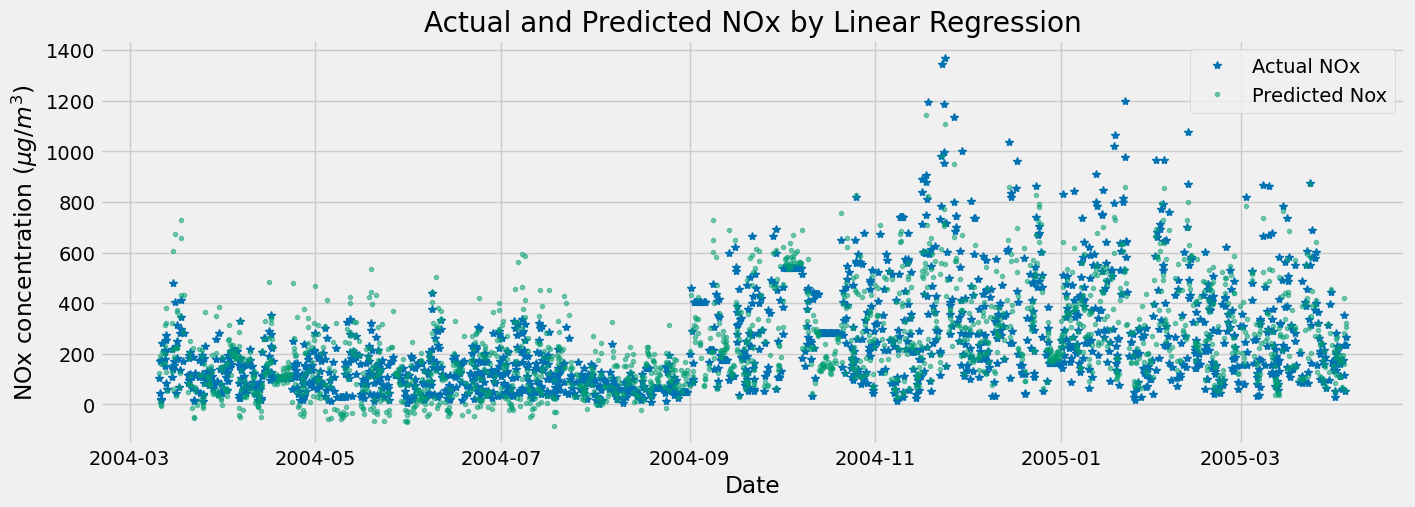

In [9]:
plt.figure(figsize=(15,5))
plt.plot(actual_and_pred.index,actual_and_pred['Actual NOx'],label='Actual NOx',linestyle='',\
    marker='*',color='#0072B2')
plt.plot(actual_and_pred.index,actual_and_pred['Predicted NOx'],label='Predicted Nox',linestyle='',\
    marker='.',color='#009E73',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('NOx concentration ($\mu g/m^3$)')
plt.title('Actual and Predicted NOx by Linear Regression')
plt.legend()
plt.show()

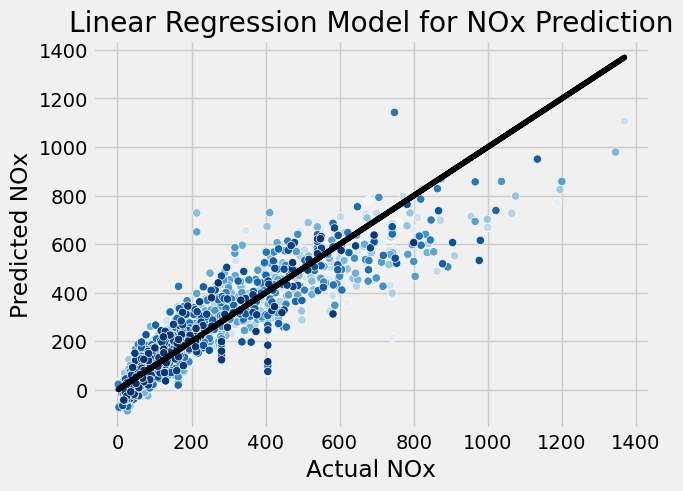

Model Intercept: 101.09
Mean Squared Error: 7581.43
Root Mean Squared Error: 87.07
R-squared (Coefficient of Determination): 0.81


In [19]:
sns.scatterplot(actual_and_pred,x='Actual NOx',y='Predicted NOx',hue=actual_and_pred.index,\
    palette='Blues',legend=False)
plt.plot(actual_and_pred['Actual NOx'],actual_and_pred['Actual NOx'],color='#000', linestyle='-')
plt.title('Linear Regression Model for NOx Prediction')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
# Model Evaluation: Some metrics to learn about the model
print("Model Intercept:", round(linear.intercept_,2))
print("Mean Squared Error:", round(mean_squared_error(y_test,y_pred_lm),2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test,y_pred_lm)),2))
print("R-squared (Coefficient of Determination):", round(r2_score(y_test, y_pred_lm),2))

### Lasso Regression Analysis

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso(alpha = 0.5)
param={'alpha':[0.1,1,2,5,10]}
lasso_reg=GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=4)

lasso.fit(X_train,y_train)


Lasso(alpha=0.5)

In [13]:
lasso_predict = lasso.predict(X_test)
lasso_predict

array([326.51187327, 213.44469053, 166.32155504, ..., 154.72487537,
       221.21572741, 259.38293736])

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

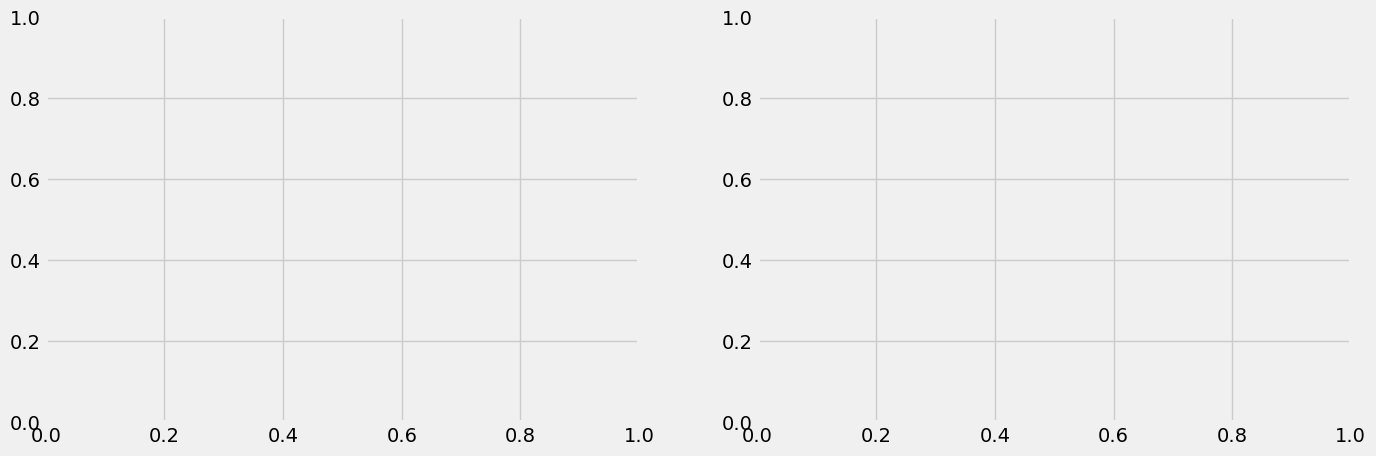

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
# sns.displot(y_test-y_pred_lm,kde=True,color='#009E73',ax=ax[0])
sns.displot(y_test-lasso_predict, kde=True, color='#009E73',ax=ax[1])
plt.show()

In [17]:
lassostat = [round(mean_squared_error(y_test,lasso_predict),2), \
             round(np.sqrt(mean_squared_error(y_test,lasso_predict)),2),\
             round(r2_score(y_test,lasso_predict),2)]
print('MSE value  {}'.format(lassostat[0]))
print('RMSE value {}'.format(lassostat[1]))
print('R^2 value {}'.format(lassostat[2]))

MSE value  7593.36
RMSE value 87.14
R^2 value 0.81
